# **Get The Dataset**

## 1. Download zip file

In [ ]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2023-02-25 03:08:12--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::6b17:d1f5, 2406:da00:ff00::22c5:2ef4, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  23.7MB/s    in 5.3s    

2023-02-25 03:08:20 (19.0 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



## 2. Extract zip

In [ ]:
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/
   creating: fruits/train/
   creating: fruits/validation/
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating: fruits/test/orange/
   creating: fruits/train/apple/
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/
   creating: fruits/train/orange/
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/._Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflatin

# **Make The Machine Learing Model**

## 1. Import Tensorflow and Matplotlib

In [ ]:
import tensorflow as tf             # Machine Learning Platform
import matplotlib.pyplot as plt     # Allow us to view images inside notebook

## 2. Prepare the images by adjust and insert them to variables

In [ ]:
img_height, img_width = 32, 32
batch_size = 20                    # How many images our ANN will train on
                                   # Before updates its parameter

train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width), 
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width), 
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width), 
    batch_size = batch_size
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


## 3. Label the images with class names

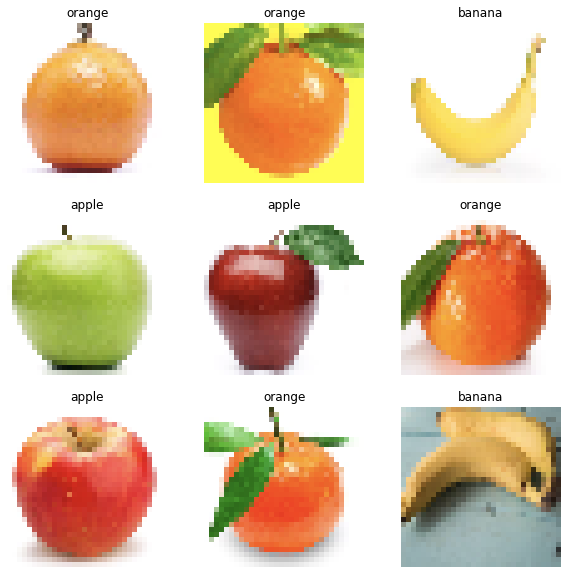

In [ ]:
class_names = ["apple", "banana", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## 4. Make The CNN Model

In [ ]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)     
    ]
)

## 5. Compile The Neural Network

In [ ]:
model.compile(
    optimizer="adam",
    loss = tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

## 6. Train The Data

In [ ]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 20
)

Epoch 1/20
23/23 [==============================] - 16s 51ms/step - loss: 1.0007 - accuracy: 0.5283 - val_loss: 0.8867 - val_accuracy: 0.5909
Epoch 2/20
23/23 [==============================] - 2s 58ms/step - loss: 0.6253 - accuracy: 0.7739 - val_loss: 0.5175 - val_accuracy: 0.8182
Epoch 3/20
23/23 [==============================] - 2s 60ms/step - loss: 0.3161 - accuracy: 0.8804 - val_loss: 0.3715 - val_accuracy: 0.8636
Epoch 4/20
23/23 [==============================] - 1s 44ms/step - loss: 0.2547 - accuracy: 0.8913 - val_loss: 0.3969 - val_accuracy: 0.8333
Epoch 5/20
23/23 [==============================] - 1s 46ms/step - loss: 0.1571 - accuracy: 0.9413 - val_loss: 0.3476 - val_accuracy: 0.8636
Epoch 6/20
23/23 [==============================] - 2s 53ms/step - loss: 0.1966 - accuracy: 0.9217 - val_loss: 0.3240 - val_accuracy: 0.8636
Epoch 7/20
23/23 [==============================] - 1s 44ms/step - loss: 0.1801 - accuracy: 0.9435 - val_loss: 0.3491 - val_accuracy: 0.8485
Epoch 8/20
2

## 7. Evaluate The Model

In [ ]:
model.evaluate(test_ds)

7/7 [==============================] - 0s 12ms/step - loss: 0.1873 - accuracy: 0.9462


[0.1872538924217224, 0.9461538195610046]

# **Make Prediction on Images**

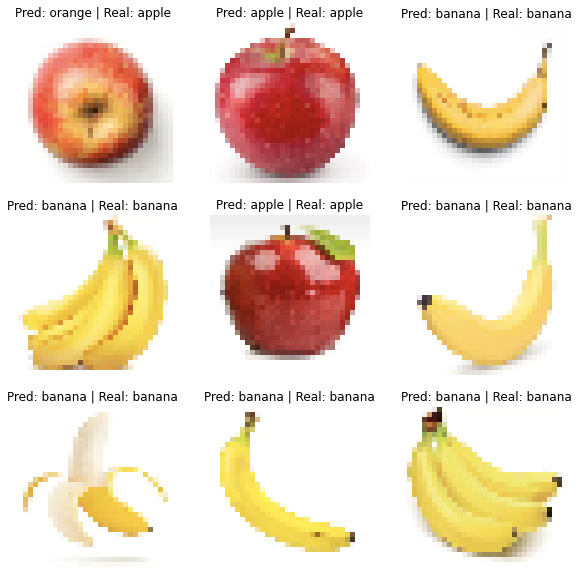

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])
    plt.axis("off")

# **Convert The Model to Tensorflow Lite**

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)